In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,  MinMaxScaler

In [8]:
wine = pd.read_csv('D:\Hitesh Files\wine.csv') 
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
wine['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [10]:
wine = wine.drop('Type', axis=1)
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
wine.shape

(178, 13)

In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [13]:
wine.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# **DATA VISUALIZATION**

**PLOTTING FOR DISTRIBUTION AND OUTLIER DETECTION**

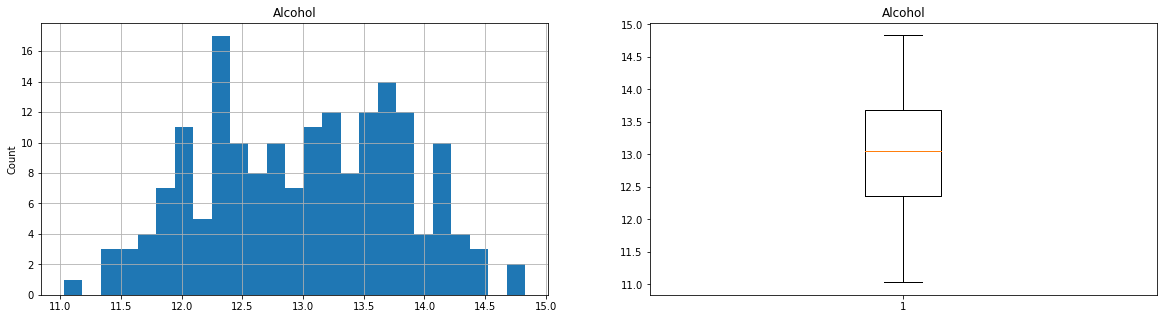

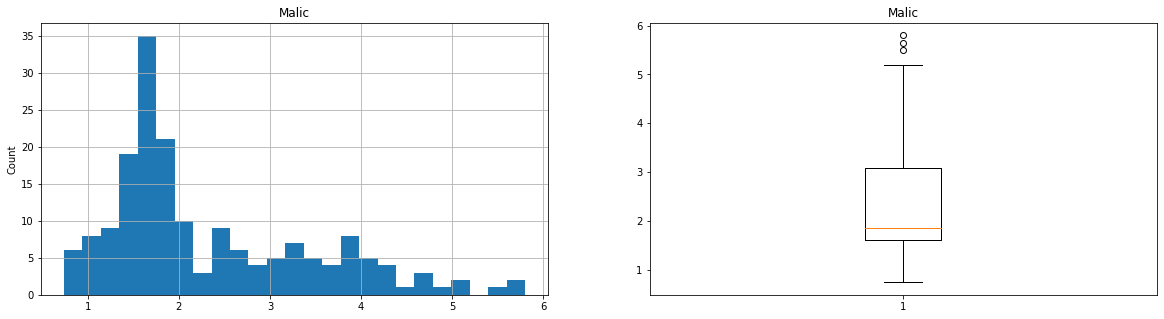

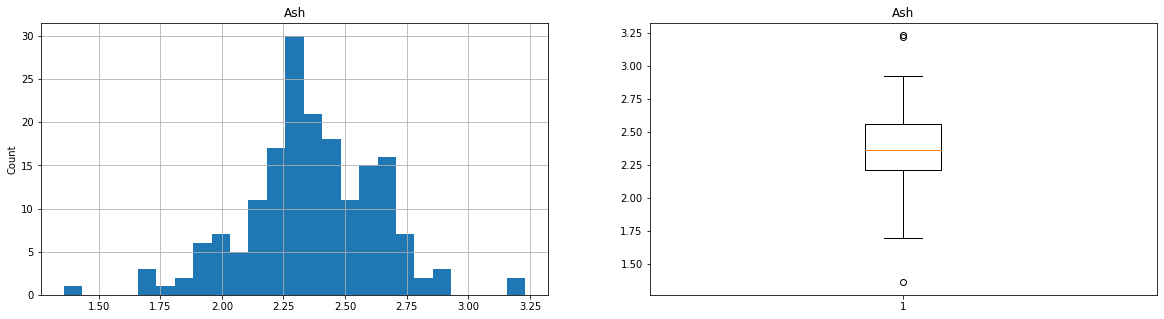

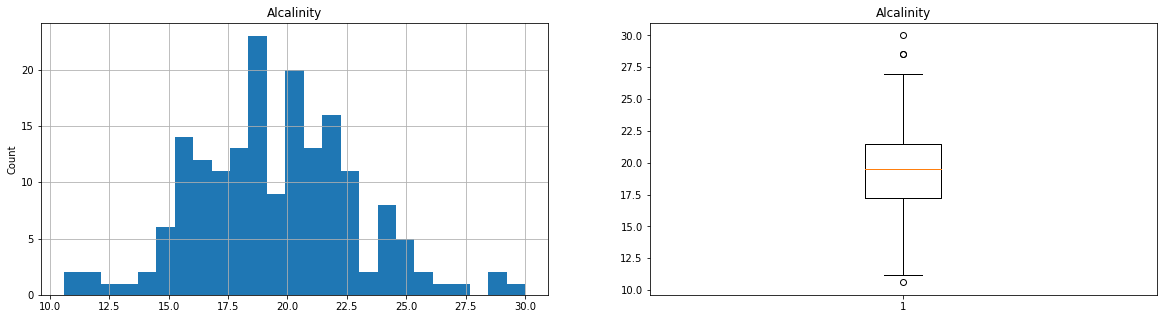

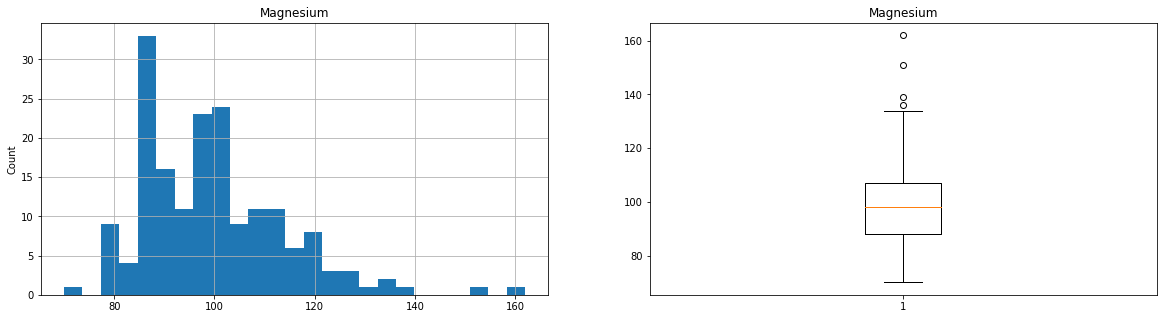

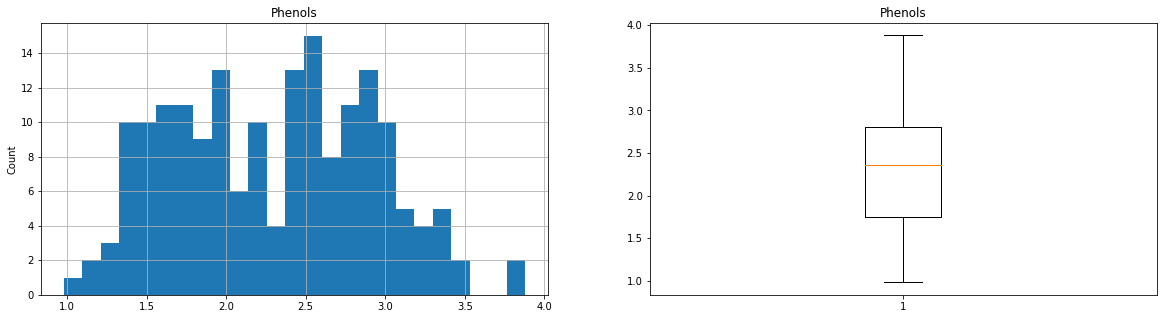

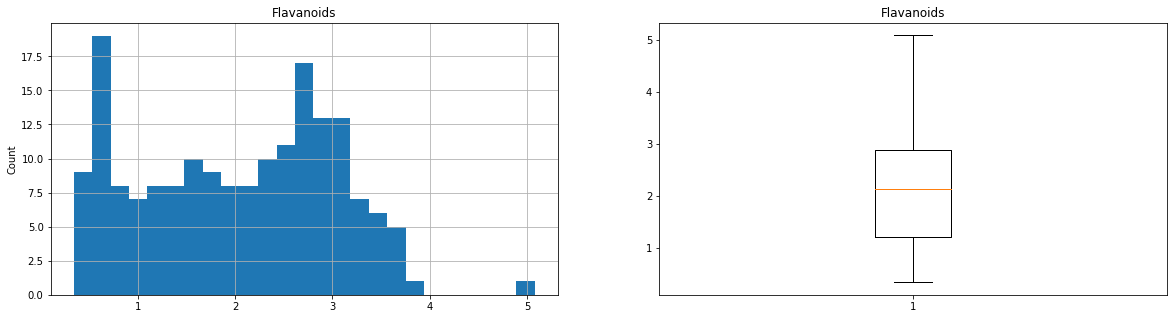

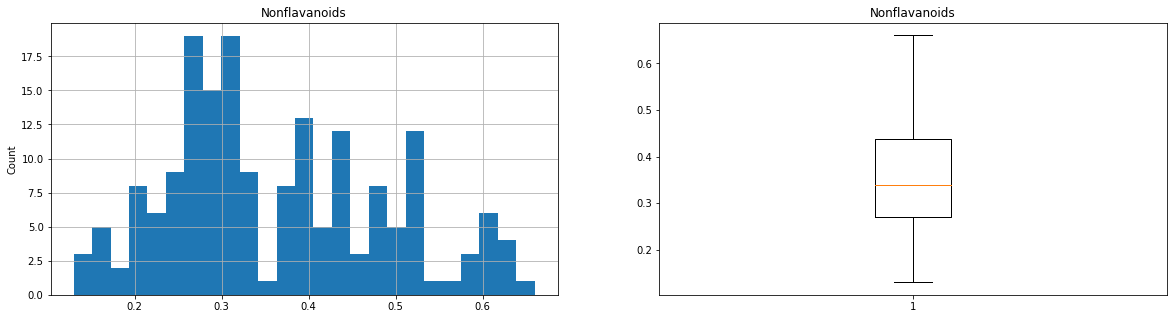

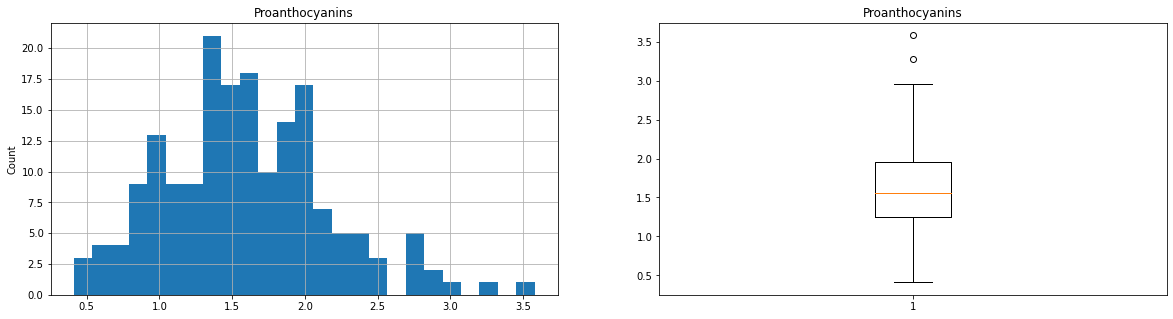

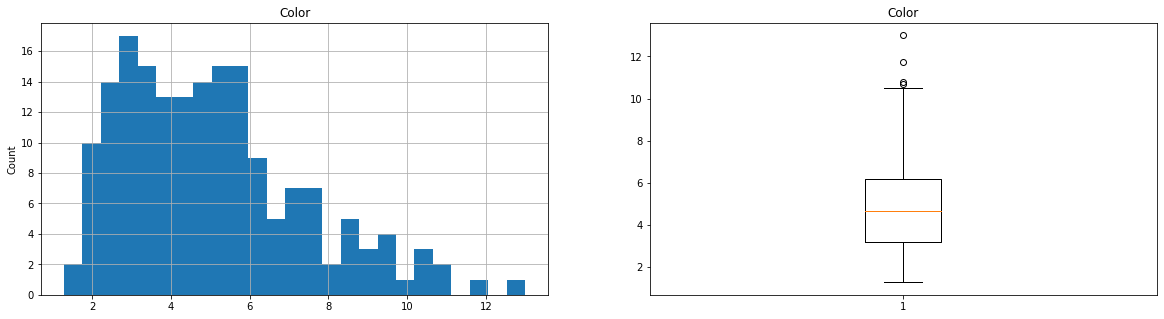

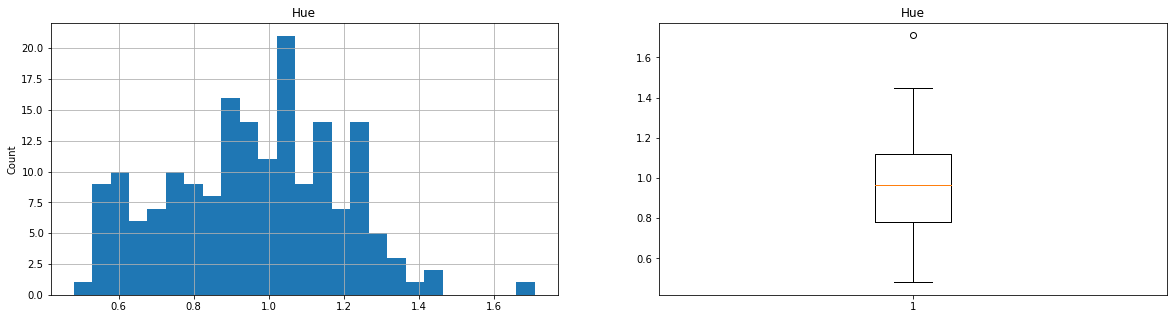

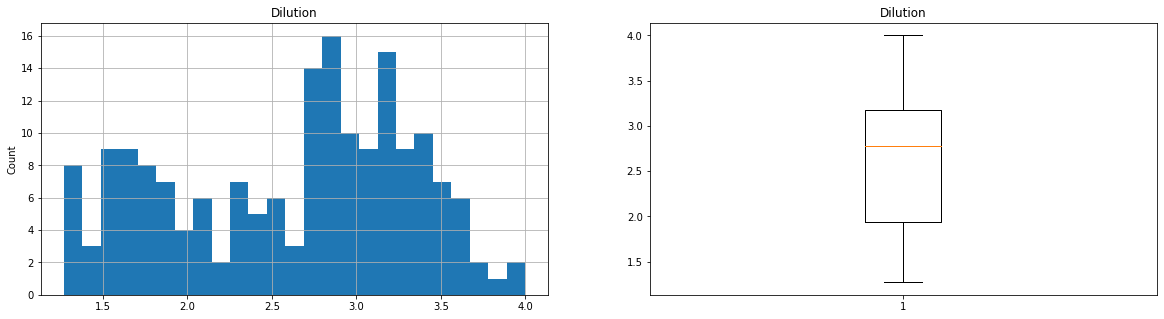

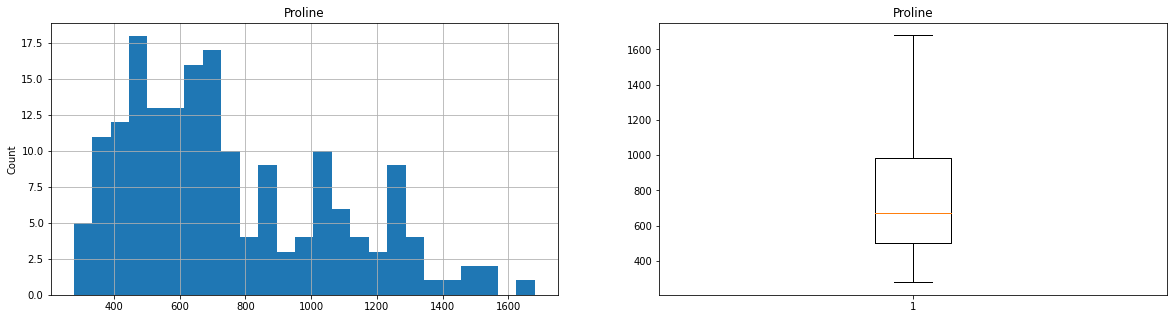

In [15]:
for feature in wine.columns:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    wine[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.subplot(1,2,2)
    plt.boxplot(wine[feature])
    plt.title(feature)
    plt.show() 

**CORRELATION**

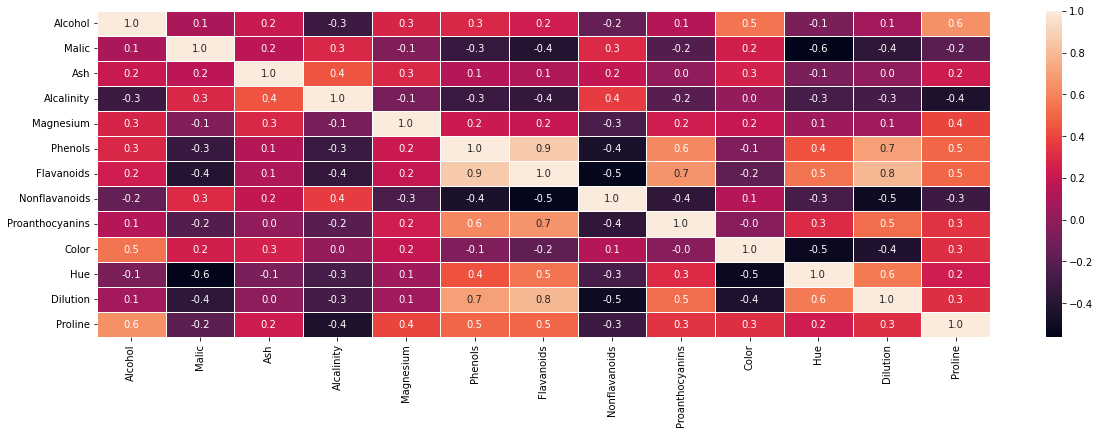

In [20]:
plt.figure(figsize=(20,6))
sns.heatmap(wine.corr(), annot=True, linewidths=0.5, fmt='.1f')
plt.show()

# **DATA PREPROCESSING**

**NORMALIZING DATA**

In [17]:
minmax = MinMaxScaler()
wine_norm = minmax.fit_transform(wine) 
wine_norm

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

**STANDARDZING DATA**

In [18]:
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine)
wine_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# **PRINCIPAL COMPONENT ANALYSIS (PCA)**

**1) PCA TO NORMALIZED DATA**

In [19]:
pca = PCA()
pca_values = pca.fit_transform(wine_norm)
pca_values

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [21]:
var = pca.explained_variance_ratio_ 
var 

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

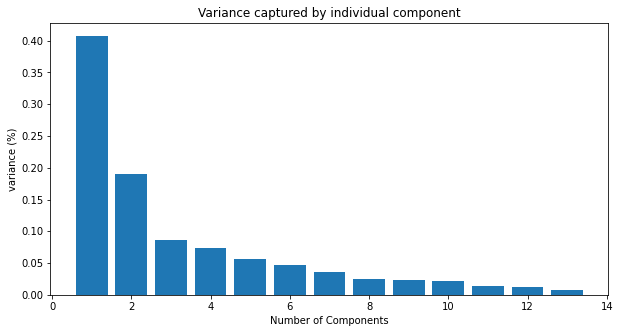

In [23]:
#variance capture by individual PCs...
plt.figure(figsize=(10,5))
plt.bar(range(1,len(var)+1) , var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Variance captured by individual component')
plt.show()

In [25]:
#Cumulative variance 
var1 = np.cumsum(np.round(var, 4)*100)
var1 

array([ 40.75,  59.72,  68.28,  75.71,  81.28,  85.94,  89.6 ,  92.01,
        94.28,  96.53,  97.91,  99.18, 100.  ])

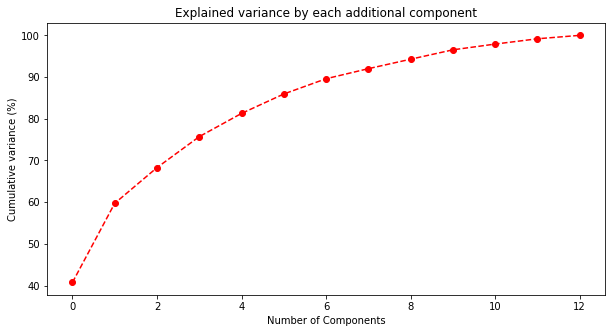

In [31]:
#Commulative Variance plot 
plt.figure(figsize=(10,5))
plt.plot(var1,color="red", linestyle='--', marker='o') 

plt.xlabel('Number of Components')
plt.title('Explained variance by each additional component')
plt.ylabel('Cumulative variance (%)')
plt.show()

**FIRST 3PCs**

In [46]:
pca = PCA(n_components=3)
pca_values = pca.fit_transform(wine_norm)
pca_values 

array([[-7.06335756e-01, -2.53192753e-01,  2.40926932e-02],
       [-4.84976802e-01, -8.82289142e-03, -2.80482048e-01],
       [-5.21172266e-01, -1.89187222e-01,  1.96216736e-01],
       [-8.21643663e-01, -5.80905512e-01,  8.11097172e-02],
       [-2.02546382e-01, -5.94665740e-02,  3.00239941e-01],
       [-6.08190152e-01, -4.87519191e-01, -7.54332321e-02],
       [-5.44047399e-01, -3.00196497e-01, -1.05074621e-01],
       [-4.74357495e-01, -2.98197021e-01, -2.82149308e-03],
       [-5.00432012e-01, -3.07602859e-01, -2.30493613e-01],
       [-6.27517969e-01, -2.06328233e-01, -1.14147932e-01],
       [-7.27467157e-01, -3.56512044e-01, -5.04199490e-02],
       [-3.74967744e-01, -2.25424535e-01, -2.86134083e-01],
       [-4.48188283e-01, -2.31938139e-01, -1.67908053e-01],
       [-6.26345329e-01, -3.55138677e-01, -8.58356579e-02],
       [-8.35717011e-01, -5.38047802e-01, -1.15202943e-01],
       [-4.71931568e-01, -3.37405385e-01, -7.27821607e-02],
       [-4.26990905e-01, -4.50842684e-01

In [47]:
var = pca.explained_variance_ratio_ 
var

array([0.40749485, 0.18970352, 0.08561671])

In [48]:
var = pca.explained_variance_ratio_ 
var

array([0.40749485, 0.18970352, 0.08561671])

In [59]:
# Creating a df with PC0, PC1, PC2 columns for clustering purpose.
wine_norm_pca = pd.DataFrame(data=pca_values, columns=['PC0', 'PC1', 'PC2'])
wine_norm_pca

,PC0,PC1,PC2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


**2) PCA ON STANDARDIZED DATA**

In [39]:
pca = PCA()
pca_values = pca.fit_transform(wine_std)
pca_values 

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [40]:
var = pca.explained_variance_ratio_ 
var 

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

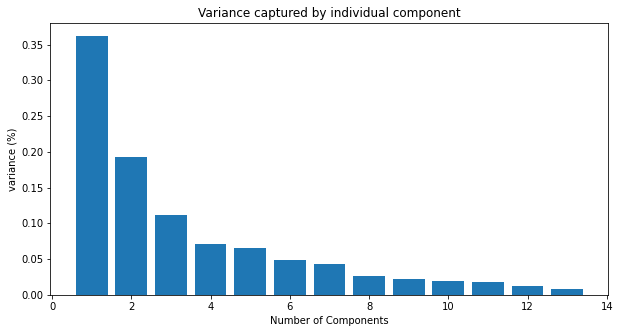

In [41]:
#Variance captured by individual PCs.
plt.figure(figsize=(10,5))
plt.bar(range(1,len(var)+1) , var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Variance captured by individual component')
plt.show()

In [43]:
# Cumulative variance 
var1 = np.cumsum(np.round(var, 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

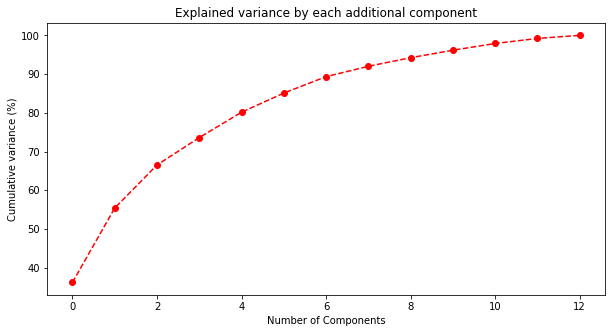

In [44]:
# Commulative Variance plot 
plt.figure(figsize=(10,5))
plt.plot(var1,color="red", linestyle='--', marker='o') 
plt.xlabel('Number of Components')
plt.title('Explained variance by each additional component')
plt.ylabel('Cumulative variance (%)')
plt.show()

**FIRST 3PCs**

In [58]:
pca = PCA(n_components=3)
pca_values = pca.fit_transform(wine_std)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [54]:
var = pca.explained_variance_ratio_ 
var 

array([0.36198848, 0.1920749 , 0.11123631])

In [55]:
# Cumulative variance 
var1 = np.cumsum(np.round(var, 4)*100)
var1  

array([36.2 , 55.41, 66.53])

In [56]:
# Creating a df with PC0, PC1, PC2 columns for clustering purpose.
wine_std_pca = pd.DataFrame(data=pca_values, columns=['PC0', 'PC1', 'PC2'])
wine_std_pca

,PC0,PC1,PC2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


# **CLUSTERING**

**1) HIERARCHICAL CLUSTERING**

In [60]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score as sil  

**1.1) FOR NORMALIZED PCA DATA**

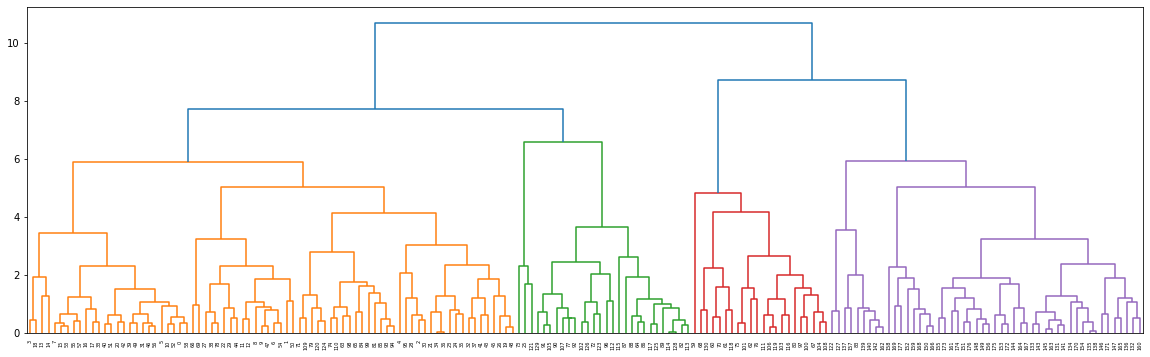

In [104]:
plt.figure(figsize=(20,6))
dendrogram = sch.dendrogram(sch.linkage(wine_norm_pca, method= 'complete'))

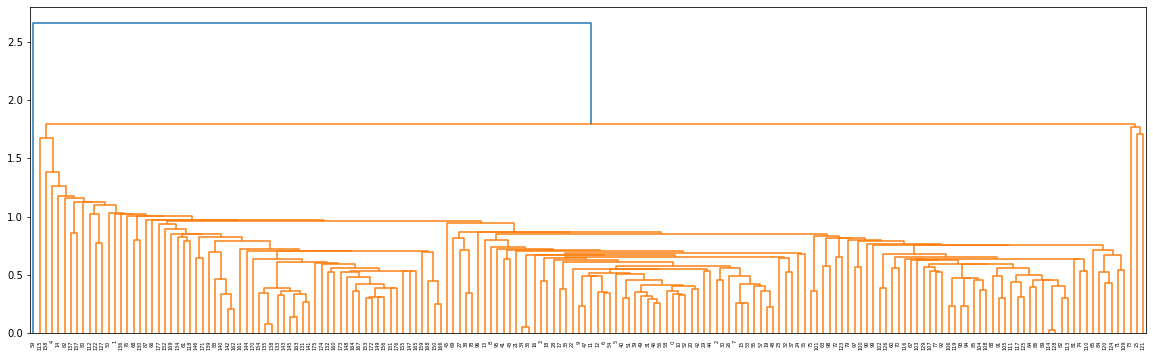

In [103]:
plt.figure(figsize=(20,6))
dendrogram = sch.dendrogram(sch.linkage(wine_norm_pca, method= 'single'))

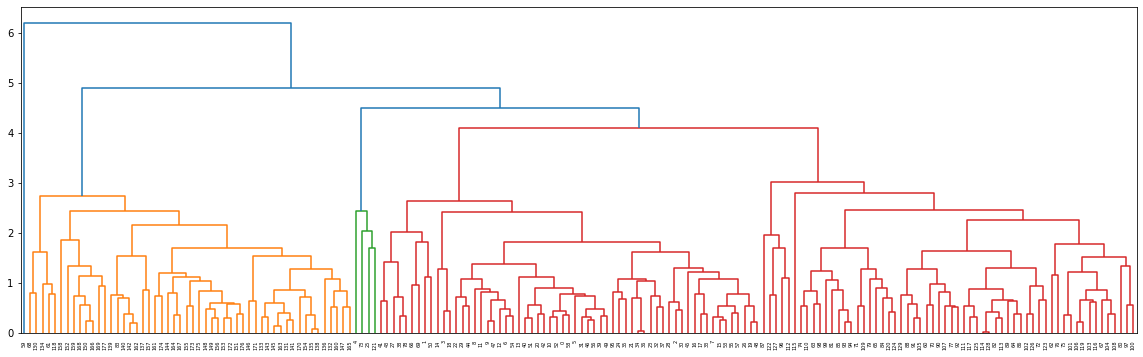

In [102]:
plt.figure(figsize=(20,6))
dendrogram = sch.dendrogram(sch.linkage(wine_norm_pca, method= 'average'))

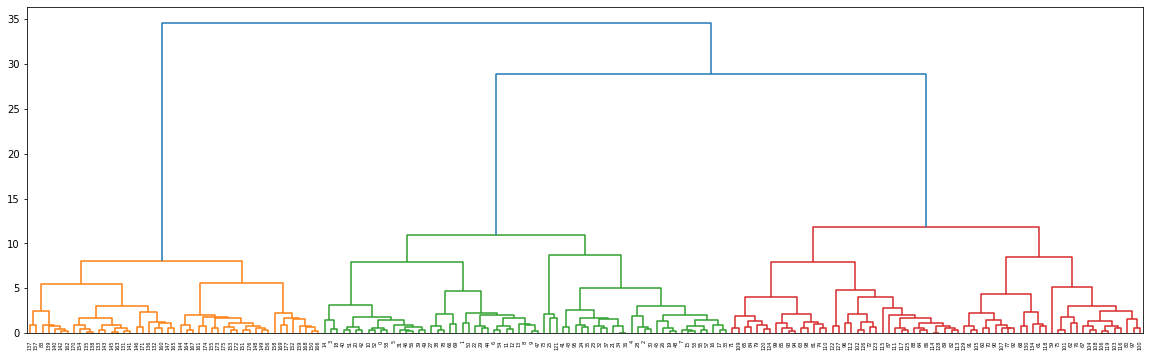

In [101]:
plt.figure(figsize=(20,6))
dendrogram = sch.dendrogram(sch.linkage(wine_norm_pca, method= 'ward'))

In [66]:
linkages = ['complete' , 'single' , 'ward' , 'average']
for i in range (2,6):
    for x in linkages:
        hc=AgglomerativeClustering(n_clusters= i, linkage=x)
        y_hc=hc.fit_predict(wine_norm_pca)
        sil_score = sil(wine_norm_pca, y_hc)
        print('For n=',i,'and linkage =', x, 'Silhouette score is', np.round(sil_score,4))
 

For n= 2 and linkage = complete Silhouette score is 0.3255
For n= 2 and linkage = single Silhouette score is 0.3631
For n= 2 and linkage = ward Silhouette score is 0.3951
For n= 2 and linkage = average Silhouette score is 0.3631
For n= 3 and linkage = complete Silhouette score is 0.2875
For n= 3 and linkage = single Silhouette score is 0.2166
For n= 3 and linkage = ward Silhouette score is 0.4459
For n= 3 and linkage = average Silhouette score is 0.3867
For n= 4 and linkage = complete Silhouette score is 0.3578
For n= 4 and linkage = single Silhouette score is 0.1362
For n= 4 and linkage = ward Silhouette score is 0.382
For n= 4 and linkage = average Silhouette score is 0.3217
For n= 5 and linkage = complete Silhouette score is 0.3558
For n= 5 and linkage = single Silhouette score is 0.1114
For n= 5 and linkage = ward Silhouette score is 0.3195
For n= 5 and linkage = average Silhouette score is 0.4465


#### Silhouette score is maximum( 0.4596) for: n= 3 and linkage = ward

In [83]:
# create clusters with ward linkage and n_clusters = 3
hc=AgglomerativeClustering(n_clusters= 3, linkage='ward', affinity='euclidean')
y_hc=hc.fit_predict(wine_norm_pca)
wine_og = pd.read_csv('D:\Hitesh Files\wine.csv')
wine_og['ClusterId_hc_norm'] = y_hc 
wine_og[['Type' , 'ClusterId_hc_norm']].head(10)

C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Type,ClusterId_hc_norm
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
5,1,2
6,1,2
7,1,2
8,1,2
9,1,2


In [84]:
wine_og.groupby('ClusterId_hc_norm').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ClusterId_hc_norm,,,,,,,,,,,,,,
0,2.030303,12.264242,1.932121,2.245455,20.087879,91.666667,2.220152,1.991364,0.367727,1.540455,3.036364,1.042515,2.729848,504.439394
1,2.978723,13.171489,3.431702,2.441064,21.595745,98.829787,1.674894,0.792979,0.452766,1.165957,7.452553,0.682979,1.702553,627.021277
2,1.092308,13.624769,1.954769,2.435538,17.373846,108.600000,2.819692,2.961692,0.290154,1.949385,5.379538,1.069538,3.149077,1079.753846


In [85]:
wine_og.groupby('Type').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterId_hc_norm
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,2.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.183099
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.958333


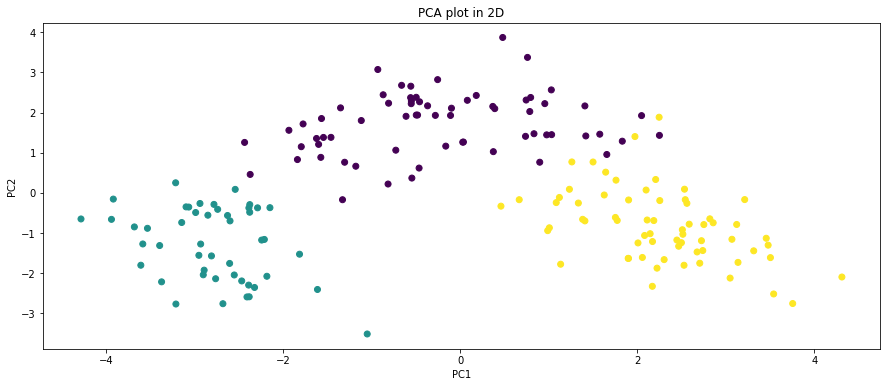

In [100]:
plt.figure(figsize=(15,6))
plt.scatter(wine_norm_pca.iloc[:,0] , wine_norm_pca.iloc[:,1], c=wine_og.ClusterId_hc_norm)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**1.2) FOR STANDARDIZED PCA DATA**

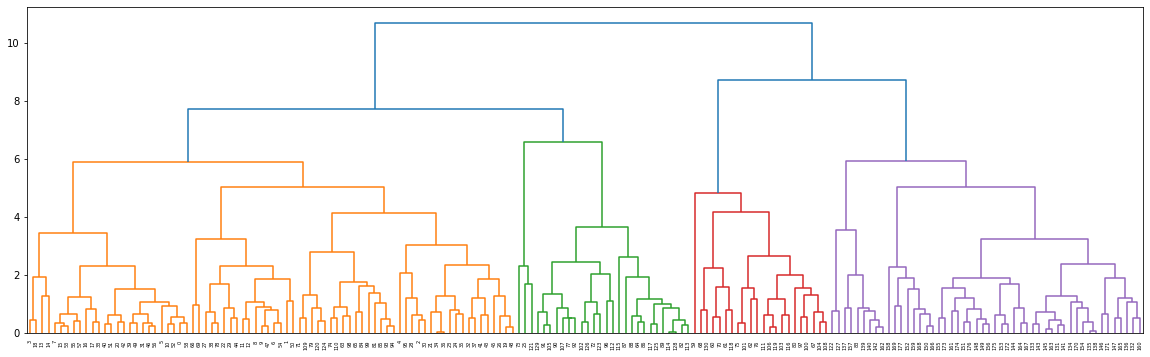

In [88]:
plt.figure(figsize=(20,6))
dendrogram = sch.dendrogram(sch.linkage(wine_std_pca, method= 'complete'))

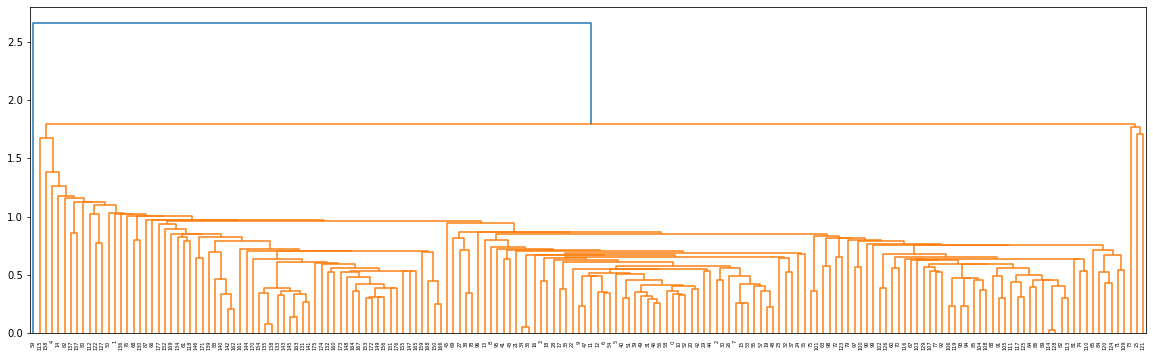

In [89]:
plt.figure(figsize=(20,6))
dendrogram = sch.dendrogram(sch.linkage(wine_std_pca, method= 'single'))

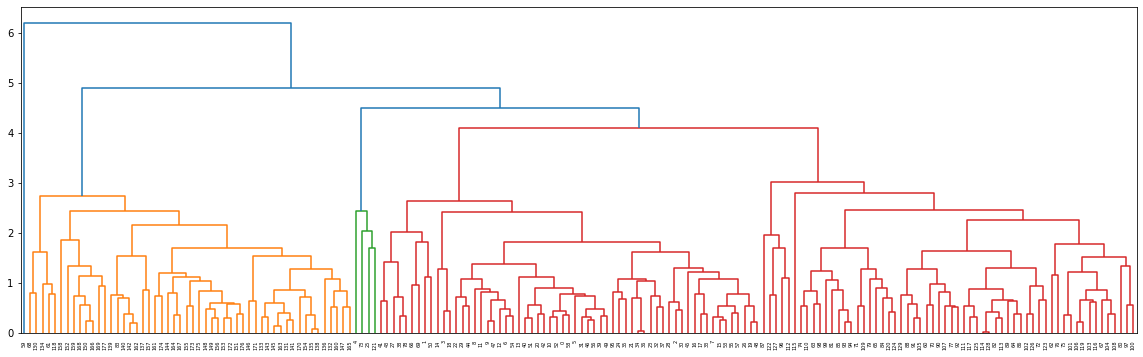

In [91]:
plt.figure(figsize=(20,6))
dendrogram = sch.dendrogram(sch.linkage(wine_std_pca, method= 'average'))

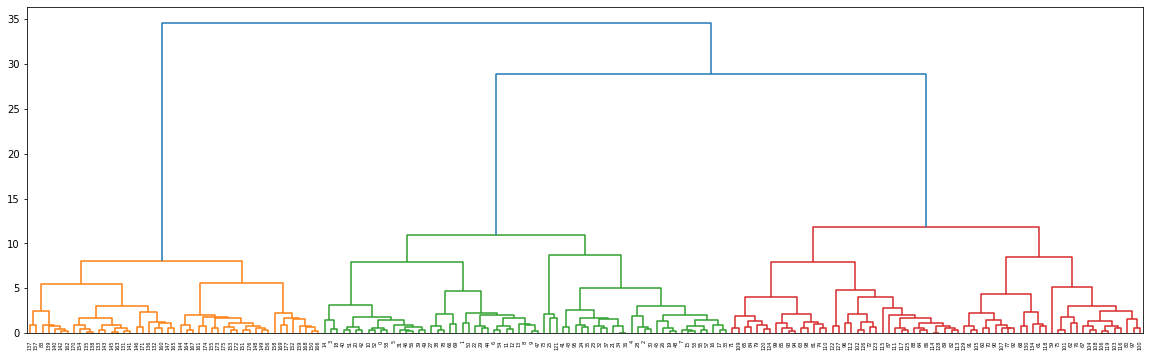

In [92]:
plt.figure(figsize=(20,6))
dendrogram = sch.dendrogram(sch.linkage(wine_std_pca, method= 'ward'))

In [93]:
linkages = ['complete' , 'single' , 'ward' , 'average']
for i in range (2,6):
    for x in linkages:
        hc=AgglomerativeClustering(n_clusters= i, linkage=x)
        y_hc=hc.fit_predict(wine_std_pca)
        sil_score = sil(wine_std_pca, y_hc)
        print('For n=',i,'and linkage =', x, 'Silhouette score is', np.round(sil_score,4))

For n= 2 and linkage = complete Silhouette score is 0.3255
For n= 2 and linkage = single Silhouette score is 0.3631
For n= 2 and linkage = ward Silhouette score is 0.3951
For n= 2 and linkage = average Silhouette score is 0.3631
For n= 3 and linkage = complete Silhouette score is 0.2875
For n= 3 and linkage = single Silhouette score is 0.2166
For n= 3 and linkage = ward Silhouette score is 0.4459
For n= 3 and linkage = average Silhouette score is 0.3867
For n= 4 and linkage = complete Silhouette score is 0.3578
For n= 4 and linkage = single Silhouette score is 0.1362
For n= 4 and linkage = ward Silhouette score is 0.382
For n= 4 and linkage = average Silhouette score is 0.3217
For n= 5 and linkage = complete Silhouette score is 0.3558
For n= 5 and linkage = single Silhouette score is 0.1114
For n= 5 and linkage = ward Silhouette score is 0.3195
For n= 5 and linkage = average Silhouette score is 0.4465


#### Silhouette score is maximum( 0.4459) for: n= 3 and linkage = ward

In [95]:
# create clusters with ward linkage and n_clusters = 3
hc=AgglomerativeClustering(n_clusters= 3, linkage='ward', affinity='euclidean')
y_hc=hc.fit_predict(wine_std_pca)
wine_og['ClusterId_hc_std'] = y_hc 
wine_og[['Type' , 'ClusterId_hc_std']].head()

C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Type,ClusterId_hc_std
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2


In [96]:
wine_og.groupby('ClusterId_hc_std').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterId_hc_norm
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ClusterId_hc_std,,,,,,,,,,,,,,,
0,2.030303,12.264242,1.932121,2.245455,20.087879,91.666667,2.220152,1.991364,0.367727,1.540455,3.036364,1.042515,2.729848,504.439394,0.0
1,2.978723,13.171489,3.431702,2.441064,21.595745,98.829787,1.674894,0.792979,0.452766,1.165957,7.452553,0.682979,1.702553,627.021277,1.0
2,1.092308,13.624769,1.954769,2.435538,17.373846,108.600000,2.819692,2.961692,0.290154,1.949385,5.379538,1.069538,3.149077,1079.753846,2.0


In [97]:
wine_og.groupby('Type').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterId_hc_norm,ClusterId_hc_std
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,2.000000,2.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.183099,0.183099
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.958333,0.958333


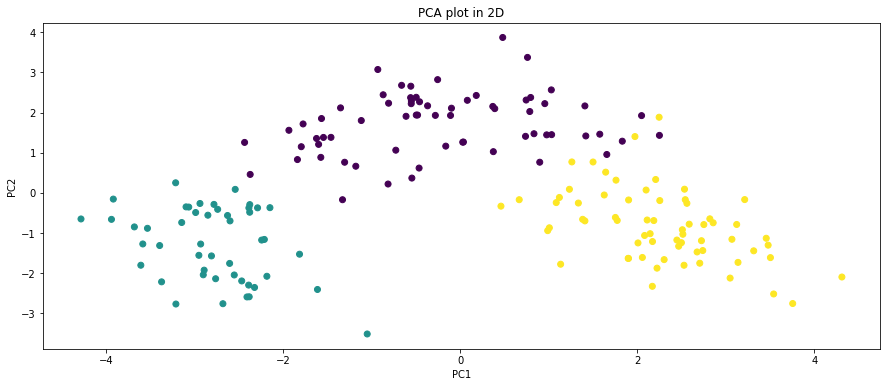

In [99]:
plt.figure(figsize=(15,6))
plt.scatter(wine_std_pca.iloc[:,0] , wine_std_pca.iloc[:,1], c=wine_og.ClusterId_hc_std)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### **2) K-means CLUSTERNIG**

**2.1) FOR NORMALIZED PCA DATA**

**Elbow Method for Determining no of cluster**

In [107]:
wcss = []

for i in range (2, 7):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(wine_norm_pca)
    wcss.append(kmeans.inertia_)
    
wcss 

C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureW

[886.16113648235,
 513.0564645910769,
 429.60154875250896,
 372.38659493085345,
 325.3402143379854]

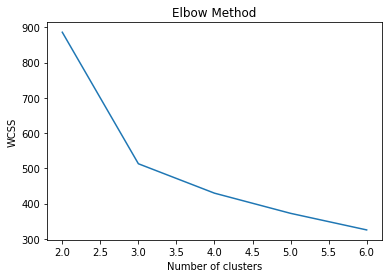

In [108]:
plt.plot(range(2, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [115]:
for i in range (2,7):
        clusters = KMeans(n_clusters=i, random_state= 1)
        clusters.fit(wine_norm_pca) 
        sil_score =sil(wine_norm_pca , clusters.labels_ )
        print('For cluster =', i , 'The silhouette score is', sil_score) 

For cluster = 2 The silhouette score is 0.38938813089003316
For cluster = 3 The silhouette score is 0.45379998482576156
For cluster = 4 The silhouette score is 0.4110296819768858
For cluster = 5 The silhouette score is 0.36209575742811606
For cluster = 6 The silhouette score is 0.30778398336863594


C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureW

#### Silhouette score is maximum (0.4779) for n\_clusters = 3

In [116]:
clusters = KMeans(n_clusters=3, random_state= 1)
clusters.fit(wine_norm_pca)

C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1)

In [117]:
clusters.labels_ 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [118]:
wine_og['ClusterId_kmean_norm'] = clusters.labels_ 
wine_og[['Type' , 'ClusterId_kmean_norm']] 

,Type,ClusterId_kmean_norm
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
173,3,1
174,3,1
175,3,1
176,3,1


In [119]:
wine_og.groupby('ClusterId_kmean_norm').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterId_hc_norm,ClusterId_hc_std
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ClusterId_kmean_norm,,,,,,,,,,,,,,,,
0,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231,0.092308,0.092308
1,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,0.921569,0.921569
2,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,2.000000,2.000000


In [120]:
wine_og.groupby('Type').agg(['mean']) 

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterId_hc_norm,ClusterId_hc_std,ClusterId_kmean_norm
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,2.000000,2.000000,2.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.183099,0.183099,0.126761
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.958333,0.958333,1.000000


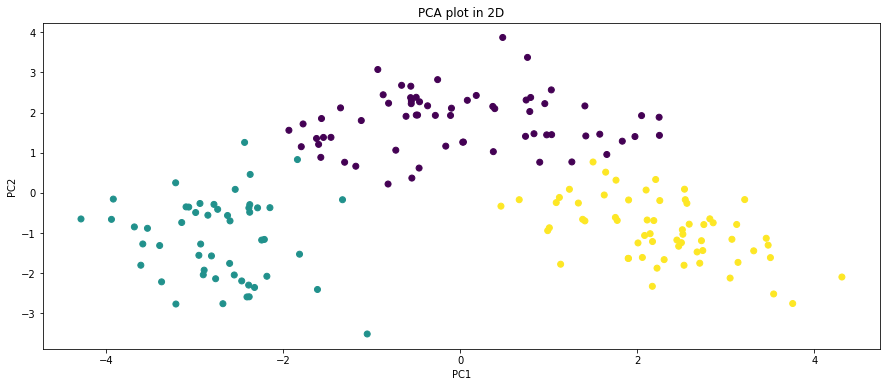

In [122]:
plt.figure(figsize=(15,6))
plt.scatter(wine_norm_pca.iloc[:,0] ,wine_norm_pca.iloc[:,1], c=wine_og.ClusterId_kmean_norm)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**2.2) FOR STANDARDIZED PCA DATA**

### **Elbow Method for Determining no of cluster**

In [123]:
wcss = []

for i in range (2, 7):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(wine_std_pca)
    wcss.append(kmeans.inertia_)
    
wcss 

C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureW

[886.16113648235,
 513.0564645910769,
 429.60154875250896,
 372.38659493085345,
 325.3402143379854]

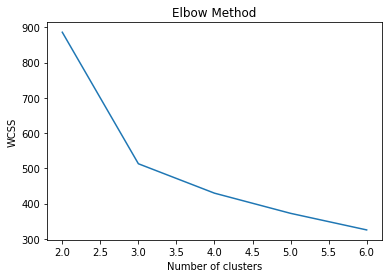

In [124]:
plt.plot(range(2, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [125]:
for i in range (2,7):
        clusters = KMeans(n_clusters=i, random_state= 1)
        clusters.fit(wine_std_pca) 
        sil_score =sil(wine_std_pca , clusters.labels_ )
        print('For cluster =', i , 'The silhouette score is', sil_score) 

For cluster = 2 The silhouette score is 0.38938813089003316
For cluster = 3 The silhouette score is 0.45379998482576156
For cluster = 4 The silhouette score is 0.4110296819768858
For cluster = 5 The silhouette score is 0.36209575742811606
For cluster = 6 The silhouette score is 0.30778398336863594


C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureW

### **Silhouette score is maximum (0.4532) for n\_clusters = 3**

In [127]:
clusters = KMeans(n_clusters=3, random_state= 1)
clusters.fit(wine_std_pca)

C:\Users\Hitesh Pardeshi\azuredatastudio-python\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1)

In [128]:
clusters.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [129]:
wine_og['ClusterId_kmean_std'] = clusters.labels_ 
wine_og[['Type' , 'ClusterId_kmean_std']] 

,Type,ClusterId_kmean_std
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
173,3,1
174,3,1
175,3,1
176,3,1


In [130]:
wine_og.groupby('ClusterId_kmean_std').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterId_hc_norm,ClusterId_hc_std,ClusterId_kmean_norm
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
ClusterId_kmean_std,,,,,,,,,,,,,,,,,
0,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231,0.092308,0.092308,0.0
1,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,0.921569,0.921569,1.0
2,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806,2.000000,2.000000,2.0


In [131]:
wine_og.groupby('Type').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClusterId_hc_norm,ClusterId_hc_std,ClusterId_kmean_norm,ClusterId_kmean_std
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,2.000000,2.000000,2.000000,2.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.183099,0.183099,0.126761,0.126761
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.958333,0.958333,1.000000,1.000000


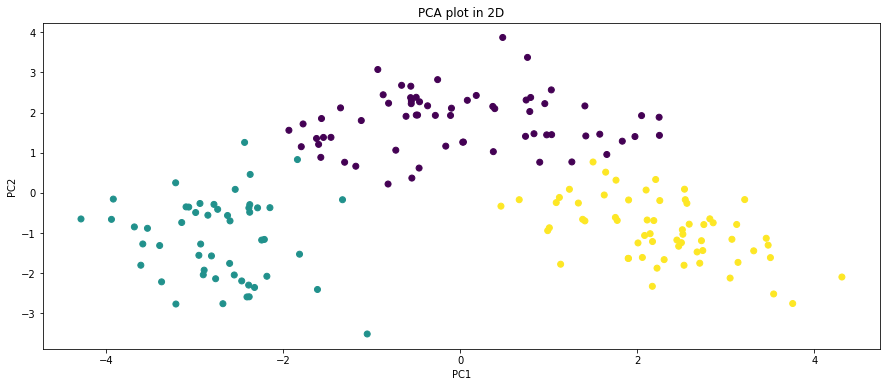

In [132]:
plt.figure(figsize=(15,6))
plt.scatter(wine_std_pca.iloc[:,0] ,wine_std_pca.iloc[:,1], c=wine_og.ClusterId_kmean_std)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## **In K Means clustering, whether be it a normalised data or standardised data with first 3 principal components, We get optimum number of clusters equal to 3 which is same as no. of clusters in original data.**

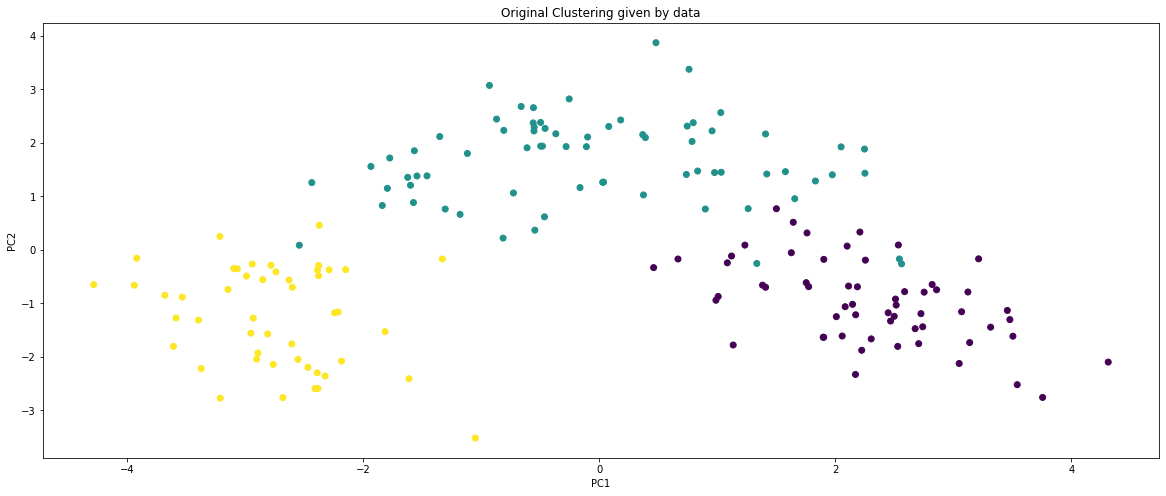

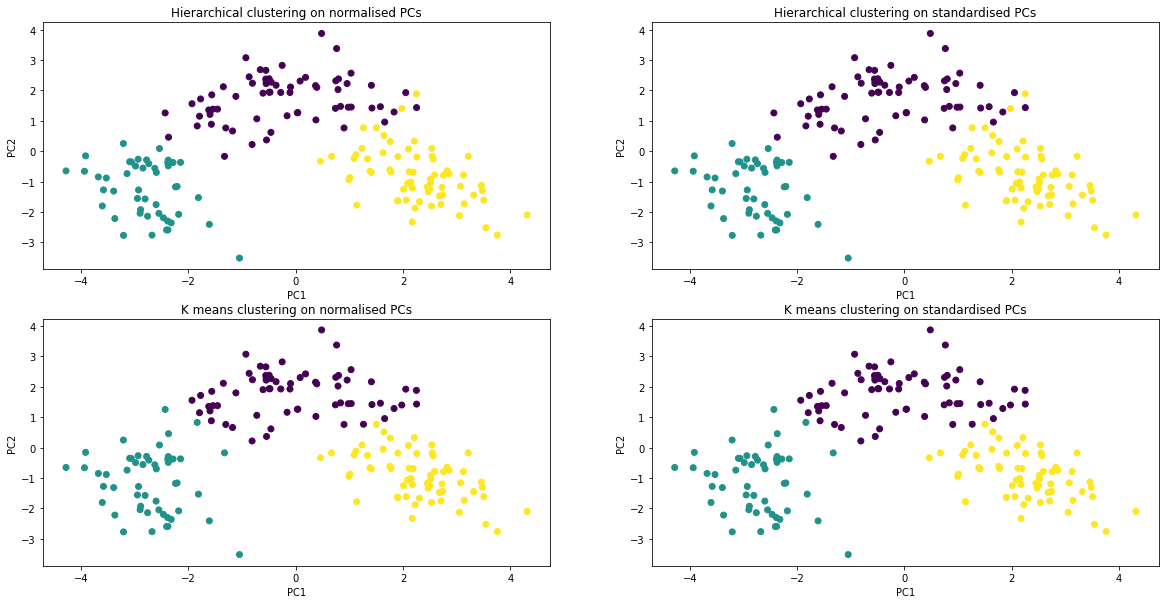

In [139]:
plt.figure(figsize=(20,8))
plt.scatter(wine_norm_pca.iloc[:,0] , wine_norm_pca.iloc[:,1], c=wine_og.Type)
plt.title('Original Clustering given by data')
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.scatter(wine_norm_pca.iloc[:,0] , wine_norm_pca.iloc[:,1], c=wine_og.ClusterId_hc_norm)
plt.title('Hierarchical clustering on normalised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.subplot(2,2,2)
plt.scatter(wine_std_pca.iloc[:,0] , wine_std_pca.iloc[:,1], c=wine_og.ClusterId_hc_std)
plt.title('Hierarchical clustering on standardised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.subplot(2,2,3)
plt.scatter(wine_norm_pca.iloc[:,0] ,wine_norm_pca.iloc[:,1], c=wine_og.ClusterId_kmean_norm)
plt.title('K means clustering on normalised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(2,2,4)
plt.scatter(wine_std_pca.iloc[:,0] ,wine_std_pca.iloc[:,1], c=wine_og.ClusterId_kmean_std)
plt.title('K means clustering on standardised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
